In [1]:
import urllib2
import numpy as np
import tarfile
import os
import gzip
import pandas as pd
import cPickle as pickle
from matplotlib.pylab import subplots
from matplotlib.ticker import MaxNLocator
import time
import datetime
import matplotlib.dates as mdates
#u='
#response = urllib2.urlopen(u)
#words = [i.strip() for i in response.readlines()]

In [2]:
#df = pd.read_csv('/Users/yjt/Downloads/final_artist_table (1).csv')
#df.head()

In [9]:

def find_period(UnixTime, periods):
    '''
    find the periods that UTCtime is in 
    :param UTCtime, like 1200835411
    :type message: int
    :param UTCtime, like [(start_UTCtime, end_UTCtime), ]
    :type message: int
    :returns: index of the period that UTCtime is in in periods, return -1 if cannot find a 
    period that UTCtime is in
    :type returns: int
    '''
    for i in range(len(periods)):
        if periods[i][0] <= UnixTime < periods[i][1]:
            return i
    
    # now we cannot find a period that UTCtime is in 
    return -1

def UTC_to_UnixTime(dt):
    '''
    Given a UTC time, find the Unix time

    :param dt, UTC datetime
    :type message: datetime.datetime
    :returns: Unix time of the UTC datetime, like 1200835411
    :type returns: int
    '''
    return int((dt - datetime.datetime(1970,1,1)).total_seconds())

def UnixTime_to_UTC(timestamp):

    '''
    converts Unix time to UTC time
    
    :param timestamp: unix timestamp
    :type timestamp: int 
    :return corresponding date and time
    :type: datetime.datetime
    '''
    # can show it use .strftime('%Y-%m-%d %H:%M:%S')
    return datetime.datetime.utcfromtimestamp(int(timestamp))

In [6]:
path = '/Users/yjt/Downloads'
filename = 'MLHD_000.tar'
os.chdir(path)

assert os.path.exists(path + '/' + filename) 

new_path = path + '/' + filename[:-4]
if not os.path.exists(new_path):
    os.makedirs(new_path)
tar = tarfile.open(path + '/' + filename)
tar.extractall(new_path)
tar.close()


In [7]:
for filename in os.listdir(new_path):
    if 'gz' not in filename:
        print filename

.DS_Store


In [21]:
MBID_dictionary = pickle.load(open('MBID_dictionary.p','rb'))
df_demographics = pd.read_csv('MLHD_demographics_scrobble.csv', delimiter = '\t')


start_time = time.time()

# graph1
# periods = [(start_UnixTime, end_UnixTime)]  converted periods
selected_datetimes = []
for i in range(18):
    for j in range(12):
        selected_datetimes.append(datetime.datetime(2001 + i, j + 1, 1))
UnixTimes = [UTC_to_UnixTime(dt) for dt in selected_datetimes]

periods = []
for i in range(len(UnixTimes) - 1):
    periods.append((UnixTimes[i], UnixTimes[i + 1])) 
    
genres = ['pop', 'rock', 'jazz', 'folk', 'blue', 'kpop'] # list of genres

# data format, dictionaries: {genres: (periods, #listeners)} 
# initialization of dictionary
statistics1 = {}
for genre in genres:
    statistics1[genre] = (periods, [0] * len(periods))
    
    
# graph 2
# ages = [1, 2, 3,...]
ages = [i + 1 for i in range(100)]


# data format, dictionaries: {genres: (ages, #listeners)} 
# initialization of dictionary
statistics2 = {}
for genre in genres:
    statistics2[genre] = (ages, [0] * len(ages))

# number of files we go through
num_file = 0
for filename in os.listdir(new_path): # iterate over all user files
    if 'gz' in filename and num_file < 1000:
        num_file += 1
        with gzip.open(new_path + '/' + filename) as f:
            # clearing the data
            user = pd.read_csv(f, delimiter = '\t', header = None)
            user = user.drop([2,3],axis=1) 
            user = user.dropna()
            user.columns = ['time', 'artist_MBID']


            # graph 1

            # one user can only be counted once for one period of every genre
            # so we use tag_added to denote whether one user is added as a listener
            # for a genre of some period 
            # tag_added initialization
            tag_added = {}
            for genre in genres:
                tag_added[genre] =  [False] * len(periods)
            user_uuid = filename[:-7]
            user_demographics = df_demographics[df_demographics.uuid == uuid]
            # user_used is a boolean indicating whether we use this user to do statistics
            # because the data of user is obtained in different time periods, so we need to
            # ensure that in the periods we used to do statistics, the user is continuing to
            # contribute data to our dataset
            user_used = user_demographics.firstscrobble <= periods[0][0] and 
                        user_demographics.lastscrobble >= periods[len(periods) - 1][1]

            # graph 2
            
            
            
            
            
            for i in range(user.shape[0]): #iterate all logs in one user file

                # graph 1
                if user_used:
                    period_index = find_period(user.iat[i,0], periods)
                    if  period_index != -1:
                        if user.iat[i,1] in MBID_dictionary:
                            taglist = MBID_dictionary[user.iat[i,1]]
                            for tag in taglist: 
                                for genre in genres:
                                    # tag can be something like 'hardrock' and 'pop/rock'
                                    if genre in tag and not tag_added[genre][period_index]:
                                        statistics1[genre][1][period_index] += 1
                                        tag_added[genre][period_index] = True



                # graph2
                

                            
                            
                            
                            
print("--- %s seconds ---" % (time.time() - start_time))           
                
                
        
        

--- 5741.85008097 seconds ---


In [39]:
num_key = 0
for key in iter(MBID_dictionary):
    if num_key < 8:
        print (key, MBID_dictionary[key])
        num_key += 1

('f0bf4fa0-028e-452f-82d3-7d4375e105dd', ['northern soul', 'classic pop and rock', 'soul', 'pop soul', 'death by pneumonia', 'death by heart attack', 'rock & roll', 'chicago soul', 'rhythm & blues'])
('aaaa267c-2ace-4846-883e-be4f6790b288', ['fiction'])
('9bbe4898-0ed4-4870-9891-7fcb7bb4d3af', ['latvian'])
('86d7ff58-35dc-4875-afdc-57e538cca822', ['acid-jazz', 'french'])
('eabe9a34-71f7-4518-817e-76f0f8b64f9b', ['production music'])
('698ff525-ff51-4206-8f08-60a7458aab24', ['hip hop rnb and dance hall', 'rapper', 'hip-hop', 'hip hop', 'producer'])
('2df1096e-cd96-40e7-9c8d-1a1a3218cf41', ['polish'])
('7489d9ba-d930-4c00-a10c-9ec66577925f', ['latvian'])


In [11]:
%matplotlib inline

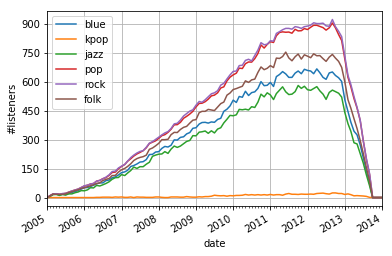

In [25]:
# visualization
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig1,ax1 = subplots()
for genre in iter(statistics1):
    dates = [UnixTime_to_UTC(period[0]) for period in statistics1[genre][0]]
    ax1.plot(dates,statistics1[genre][1], label = genre)


ax1.legend(loc='best')
ax1.set_xlabel('date')
ax1.set_ylabel('#listeners')

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(yearsFmt)
ax1.xaxis.set_minor_locator(months)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

datemin = datetime.datetime(2005, 1, 1)
datemax = datetime.datetime(2014, 1, 1)
ax1.set_xlim(datemin, datemax)


# format 
#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax1.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig1.autofmt_xdate()

fig1.show()

#print tuple(genres)
#print statistics1['kpop']




blue
kpop
jazz
pop
rock
folk


In [9]:
x = [1,2,3,4,5,6]
y = [2 * i for i in x]
y

[2, 4, 6, 8, 10, 12]

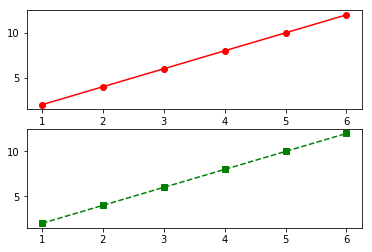

In [12]:
import matplotlib
from matplotlib.pylab import subplots
x = [1,2,3,4,5,6]
y = [2 * i for i in x]
fig,axs=subplots(2,1) # 2-rows, 1-column
axs[0].plot(x,y,'r-o')
axs[1].plot(x,y,'g--s')
fig.show()

In [24]:
df = pd.DataFrame({'col1': [1,1,0,0], 'col2': [1,2,3,4]})
df.head()

,col1,col2
0,1,1
1,1,2
2,0,3
3,0,4


In [27]:
df.iat[2,1]

3

In [6]:
df['sum_col']=df.eval('col1+col2')

In [7]:
df.head()

,col1,col2,sumcol,sum_col
0,1,1,1,2
1,1,2,1,3
2,0,3,1,3
3,0,4,1,4


In [33]:
a = [(1,2), (2,3,4)]
a[0,1]

TypeError: list indices must be integers, not tuple

In [33]:
x = [1,2]
y = [2,3]
a = {'a': (x,y), 'b':(x,y)}
a['a']

([1, 2], [2, 3])

In [34]:
a ['a'] = 1
print a

{'a': 1, 'b': ([1, 2], [2, 3])}


In [35]:
df = pd.DataFrame.from_dict(a)
df.head(8)

,a,b
0,1,"[1, 2]"
1,1,"[2, 3]"


In [39]:
 'rock' not in 'rock/pop'

False

In [45]:
[0] * 7

[0, 0, 0, 0, 0, 0, 0]

In [47]:
(1,2) == (1,3)

False

In [53]:
a = [1,2]
a + [3]

[1, 2, 3]

In [18]:
np.mean((1,2))

1.5

In [91]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')
print years